In [1]:
import cv2
import numpy as np
import sys

In [ ]:
src = cv2.imread('./lenna.bmp')
# 100을 클리핑 안하고 그냥 더하면 255가 넘어간다(src+100)
# dst = np.clip(src + 100., 0, 255).astype(np.uint8)
# 마지막 알파채널?
dst = cv2.add(src, (100, 100, 100, 0))

if src is None:
    print('image read failed')
    sys.exit()
    
cv2.imshow('src', src)
cv2.imshow('src +100', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
import matplotlib.pyplot as plt

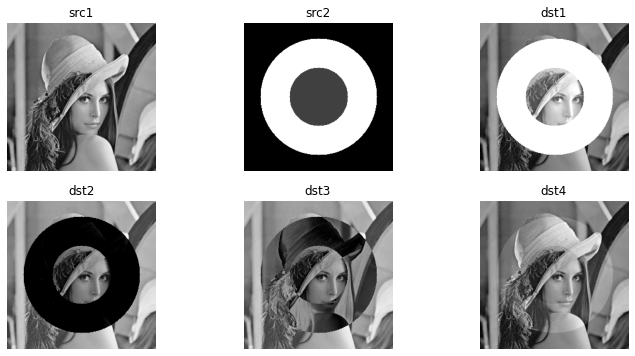

In [10]:
src1 = cv2.imread('./fig/lenna256.bmp', 0)
src2 = np.zeros((256, 256), np.uint8)

cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.subtract(src1, src2)
# abs = 절대값
dst3 = cv2.absdiff(src1, src2)
dst4 = cv2.addWeighted(src1, 0.9, src2, 0.1, 0)

plt.figure(figsize = (12, 6))
plt.subplot(231), plt.imshow(src1, cmap='gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap='gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst1, cmap='gray'), plt.axis('off'), plt.title('dst1')
plt.subplot(234), plt.imshow(dst2, cmap='gray'), plt.axis('off'), plt.title('dst2')
plt.subplot(235), plt.imshow(dst3, cmap='gray'), plt.axis('off'), plt.title('dst3')
plt.subplot(236), plt.imshow(dst4, cmap='gray'), plt.axis('off'), plt.title('dst4')

# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
# cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread('./fig/key_test.png')
hat = cv2.imread('./img_resize.png', cv2.IMREAD_UNCHANGED)

h,w = src.shape[:2]

hat = cv2.resize(hat, (300, 400))

crop = src[5:5+400, 210:210+300]

mask = hat[:,:,-1]
hat1 = hat[:,:,0:3]

cv2.copyTo(hat1, mask, crop)


for i in range(101):
    alpha = i*0.01
    
    dst = cv2.addWeighted(img2, alpha, img1, 1-alpha, 0)
    
    cv2.imshow('image', dst)
    
    if cv2.waitKey(50) == 27:
        break

# crop[ mask > 0] = (0,0,255)

cv2.imshow('src', src)
# cv2.imshow('hat1', hat1)
# cv2.imshow('mask', mask)
# cv2.imshow('crop', crop)


# cv2.imwrite('img_resize.png', src)



In [20]:
img1 = cv2.imread('./fig/key_test.png')
img2 = cv2.imread('./img_resize.png')


for i in range(101):
    alpha = i*0.01
    
    dst = cv2.addWeighted(img2, alpha, img1, 1-alpha, 0)
    
    cv2.imshow('image', dst)
    
    if cv2.waitKey(50) == 27:
        break
        
        
cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
src1 = np.zeros((256, 256), np.uint8)
src2 = np.zeros((256, 256), np.uint8)

cv2.rectangle(src1, (10, 10), (127, 250), 255, -1)
cv2.circle(src2, (128, 128), 100, 255, -1)

bit_and = cv2.bitwise_and(src1, src2)
bit_or = cv2.bitwise_or(src1, src2)
bit_xor = cv2.bitwise_xor(src1, src2)
bit_not = cv2.bitwise_not(src1)


cv2.imshow('src1', src1)
cv2.imshow('src2',src2)
cv2.imshow('bit_and', bit_and)
cv2.imshow('bit_or', bit_or)
cv2.imshow('bit_xor', bit_xor)
cv2.imshow('bit_not', bit_not)

cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
src = cv2.imread('./fig/flowers.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

b, g, r = cv2.split(src)
h, s, v = cv2.split(src_hsv)
# src_merge = cv2.merge((b, g, r))

cv2.imshow('src', src)
# cv2.imshow('src_merge', src_merge)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)


cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
import cv2
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# For static images:
IMAGE_FILES = []
with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      print('Nose tip:')
      print(mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
      mp_drawing.draw_detection(annotated_image, detection)
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_face_detection.FaceDetection(
    model_selection=0, min_detection_confidence=0.5) as face_detection:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_detection.process(image)

    # Draw the face detection annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.detections:
      for detection in results.detections:
        mp_drawing.draw_detection(image, detection)
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Face Detection', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

ModuleNotFoundError: No module named 'mediapipe'